In [1]:
import os
os.getcwd()
os.chdir("../..")
os.getcwd()

'C:\\Users\\omris\\OneDrive\\python\\me_toolbox'

# Single threaded fastner strength calculations

<table><tr>
<td> 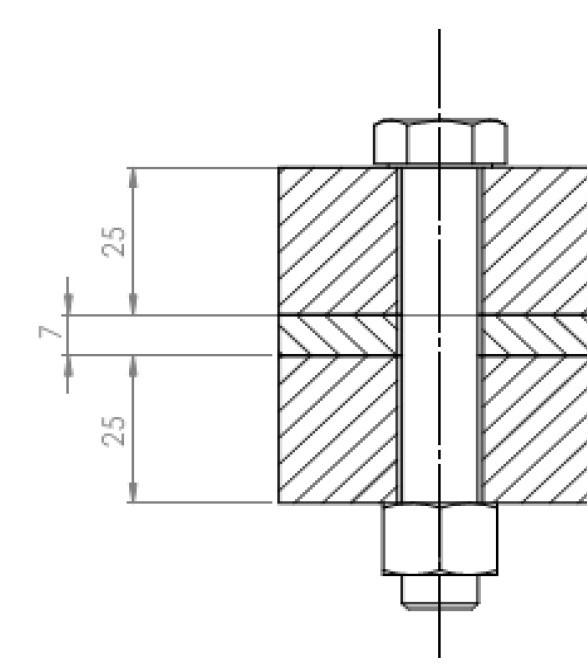 </td>
</tr></table>

An external force of 10000$[N]$ is applied to the fastener.

The first substrate is made from caste iron with an elastic modulus of 153$[GPa]$<br>
The second substrate is made from copper with an elastic modulus of 128$[GPa]$<br> 
The third substrate is made from steel with an elastic modulus of 207$[GPa]$ 

The bolt is an M12x1.75 grade 9.8 and made of steel with an elastic modulus of 207$[GPa]$



Importing the relevant Classes

In [2]:
from me_toolbox.fasteners import ThreadedFastener
from me_toolbox.fasteners import Bolt

Bolt properties

In [3]:
diameter = 12 # [mm]
pitch = 1.75 # [mm]
length = 55 # [mm]
threaded_length = 30 # [mm]
grade = '9.8'
E = 207e3 # [MPa]

Using Bolt's built-in method to get the strength properties (in MPa) out of the grade and diameter

In [4]:
Sy, Sut, Sp = Bolt.get_strength_prop(diameter, grade)

print(f"Proof Strength - Sp = {Sp} [MPa]\n"
    f"Ultimate Tensile Strength - Sut = {Sut} [MPa]\n"
    f"Yield Strength - Sy = {Sy} [MPa]")


Proof Strength - Sp = 650 [MPa]
Ultimate Tensile Strength - Sut = 900 [MPa]
Yield Strength - Sy = 720 [MPa]


Defining a bolt object

In [5]:
M12 = Bolt(diameter, pitch, length, threaded_length, Sy, Sut, Sp, E)

List of substrates thicknesses (in mm)

In [6]:
thickness = [25, 7, 25]

List of substrates elasticity (in Mpa)

In [7]:
elastic = [153e3, 128e3, 207e3]

Making a list made of the substrate thickness and elasticity pairs <br>
$[[mm,MPa],[mm,MPa],[mm,MPa]]$

In [8]:
layers = [[t, E] for t, E in zip(thickness, elastic)]  # [[25,153e3], [7,128e3], [25,207e3]]

import inflect
p = inflect.engine()

for i, layer in enumerate(layers):
    print(f"{p.ordinal(i+1)} layer: {layer[0]}mm , {layer[1]} MPa")

1st layer: 25mm , 153000.0 MPa
2nd layer: 7mm , 128000.0 MPa
3rd layer: 25mm , 207000.0 MPa


If the preload is not given we can estimate it by using the bolt's estimate_preload methode.<br>
The logic behind the method is as follow:<br>
If the fastener is ment to be taken appart and reused than the preload shuold be 75% of the proof load.<br>
If the fastener is ment to be permanent than the preload should be 90% of the proof load.  

In [21]:
preload = M12.estimate_preload(reused=True)
print(f"Preload = {preload:.2f}[N]")

Preload = 41079.94[N]


Defining threaded fastener object

In [10]:
fastener = ThreadedFastener(M12, layers, nut=False, preload=preload)

In [11]:
km = fastener.member_stiffness
kb = fastener.bolt_stiffness
C = fastener.fastener_stiffness

print(f"Member Stiffness - Km = {km*1e-3:.2f} [kN/mm]\n"
    f"Bolt Stiffness - kb = {kb*1e-3:.2f} [kN/mm]\n"
    f"Fastener Stiffness - C = {C:.2f} [kN/mm]")


Member Stiffness - Km = 1762.89 [kN/mm]
Bolt Stiffness - kb = 551.53 [kN/mm]
Fastener Stiffness - C = 0.24 [kN/mm]


In [12]:
print(f"Proof Strength - Sp = {M12.proof_strength} [kN/mm]\n"
    f"Stress Area - At = {M12.stress_area:.2f} [kN/mm]\n"
    f"Proof Load - Fp = {M12.proof_load:.2f} [kN/mm]")


Proof Strength - Sp = 650 [kN/mm]
Stress Area - At = 84.27 [kN/mm]
Proof Load - Fp = 54773.25 [kN/mm]


Using Bolt's object built-in function to return an estimated preload.<br>
If the bolt is ment to be reused then the estimated preload is 75% of the bolt's proof load,<br>
If the bolt is not ment to be reused then the estimated preload is 90% of the bolt's proof load.

Setting the external force (in $[N]$) operating on the fastener

In [13]:
external_force = 10000  # [N]

Calculating the load operating on the bolt

In [14]:
bolt_load = fastener.bolt_load(external_force)
print(f"Bolt Load - Fb = {bolt_load:.2f}")

Bolt Load - Fb = 43462.95


Calculating the bolt's equivalent stress<br>
(The bolt's load devided by the stree area, $σ_{eq}=\Large\frac{F_{b}}{A_{t}}$)

In [15]:
σ_eq = fastener.bolt_stress(bolt_load,M12.stress_area)

Finding safty factors

Seperation Safety Factor - $n_{0}$<br>
Is the non-separation safety factor between the substrates,<br>
which is a necessary condition for the fastener to function.

In [16]:
print(f"Separation Safety Factor - n0 = {fastener.separation_safety_factor(external_force):.2f}")

Separation Safety Factor - n0 = 5.39


Load Safety Factor - <br>
Means how many times the external load (P) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [17]:
print(f"Load Safety Factor - nL = {fastener.load_safety_factor(σ_eq):.2f}")

Load Safety Factor - nL = 5.75


Proof Safety Factor - <br>
Means how many times the Bolt load ($F_{b}$) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [18]:
print(f"Proof Safety Factor - np = {fastener.proof_safety_factor(σ_eq):.2f}")

Proof Safety Factor - np = 1.26
